In [13]:
import librosa
import librosa.display
import IPython.display as ipd

In [14]:
def convert(x: np.ndarray, L: float) -> np.ndarray:
    L = float(L)
    frac = str(L).split(".")[1]

    factor = 0
    if len(frac) == 1 and frac != "0":
        factor = 1
    elif len(frac) > 1:
        factor = 2

    L1 = int(np.round(L, factor) * 10**factor)
    L2 = 10**factor

    if L1 == L2:
        return x

    # Stretch
    N = x.size * L1
    y = np.zeros(N, dtype=x.dtype)
    y[np.arange(N) % L1 == 0] = x

    # Filter
    for i in np.arange(1, L1):
        indices = np.arange(x.size) * L1 + i
        y[indices] = y[indices - 1]

    # Downsample
    return y[np.arange(0, y.size // L2) * L2]

In [15]:
audio_data = 'data/kutlov_voice_2022.10.25.wav'
y, sr = librosa.load(audio_data)
print(type(y), type(sr))
print(y.shape, sr)
print(y, sr)

<class 'numpy.ndarray'> <class 'int'>
(349454,) 22050
[-1.2403750e-04 -1.6140242e-04 -1.1281282e-04 ...  5.8203714e-05
  6.9623027e-05  0.0000000e+00] 22050


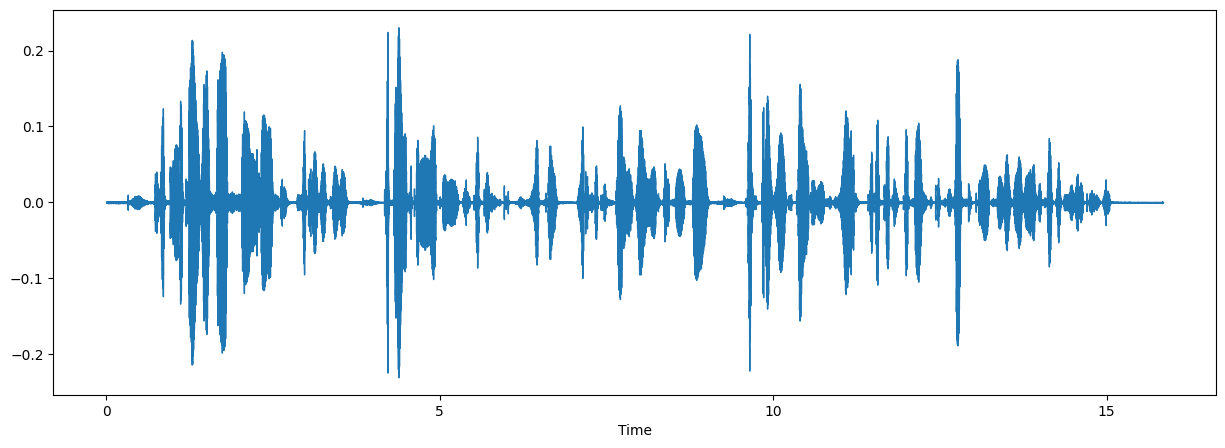

In [16]:
plt.figure(figsize=(15, 5))
librosa.display.waveshow(y, sr=sr)
ipd.Audio(y, rate=sr)

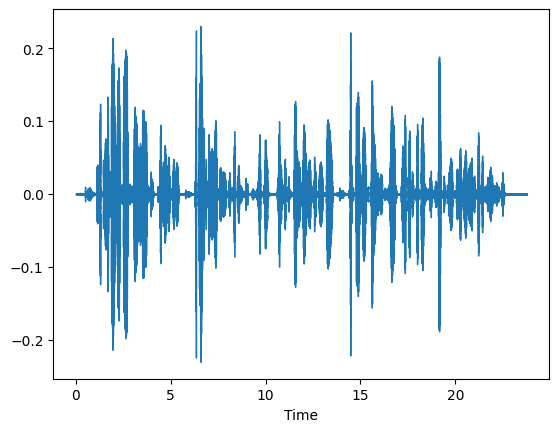

In [17]:
L = 1.5
x = convert(y, L)
librosa.display.waveshow(x, sr=sr)
ipd.Audio(x, rate=sr)